### 2.2.4 サポートベクターマシン

In [2]:
# hide
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plt_predict(model, axe, X, title):
    xmin, xmax, ymin, ymax = X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max(), 
    grid = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/300.0), 
                       np.arange(ymin, ymax, (ymax-ymin)/300.0), indexing='xy')
    g = [[x, y] for x, y in zip(np.hstack(grid[0]), np.hstack(grid[1]))]
    p_g = model.predict(g)
    axe.scatter(grid[0], grid[1], c = p_g, cmap=cm.Pastel1, s = 1)
    axe.set_title(title)

def plt_predict_line(model, X, axe, label):
    eps =  X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)    
        
    grid = np.meshgrid(xx, yy)
#    g = [[x, y] for x, y in zip(np.hstack(grid[0]), np.hstack(grid[1]))]
    g = np.c_[grid[0].ravel(), grid[1].ravel()]
    p_g = model.predict(g)
   # axe.scatter(grid[0], grid[1], c = p_g)
    axe.contour(grid[0], grid[1], p_g.reshape(grid[0].shape))
    axe.set_title(label)    

- 基本的に線形モデルと同様に直線もしくは超平面で空間を区切る
- 線形モデルではすべてのサンプルと超平面の距離を最大化する
- SVMではサポートベクターと呼ばれる少数の点を代表点と考え、その点との距離を最大化する

<img src="images/SVM_margin.png" width="400"/>

https://ja.wikipedia.org/wiki/%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%82%BF%E3%83%BC%E3%83%9E%E3%82%B7%E3%83%B3 より


'2つのクラス'

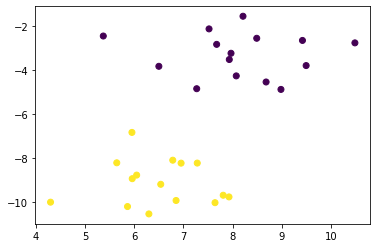

In [4]:
# hide
X, y = make_blobs(random_state=6, centers=2, n_samples= 30)
plt.scatter(X[:, 0], X[:, 1], c=y)
"2つのクラス"

- 通常の線形モデルとは異なる境界線になる
- 星印がサポートベクター

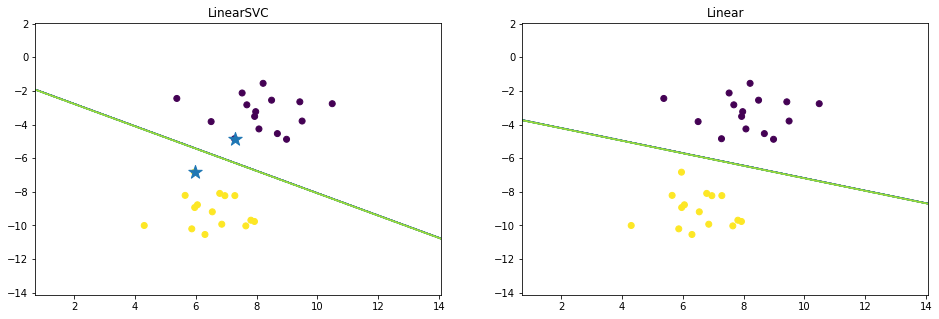

In [53]:
# hide 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

_, axes = plt.subplots(1, 2, figsize=(16,5))

mdl = SVC(kernel="linear")
mdl.fit(X, y)
axes[0].scatter(X[:, 0], X[:, 1], c=y)
plt_predict_line(mdl, X, axes[0], "LinearSVC")
axes[0].scatter(mdl.support_vectors_[:, 0], mdl.support_vectors_[:, 1], 
                marker='*', s=200)

mdl2 = LogisticRegression()
mdl2.fit(X, y)
axes[1].scatter(X[:, 0], X[:, 1], c=y)
plt_predict_line(mdl2, X, axes[1], "Linear")



#### カーネル法

- SVM そのものの識別能力は、線形モデルと大差ない
- 「カーネル」を用いるとはるかに強力になる

> **カーネル法**  
> モデルの表現力を高めるために、データ点を高次元空間に写像し、その高次元空間でのデータ点間の類似度を用いて識別を行う。
> この時、高次元空間への写像とその空間での類似度を、直接計算する事ができれば計算が容易になる。
> このような関数を **カーネル関数** と呼び、カーネル関数を用いる方法を **カーネルトリック** と呼ぶ。

- カーネル法は線形モデルと組み合わせることも可能だが、SVMと組み合わせて広く用いられる
- 一般に単に「SVM」と言えば、「カーネル法を用いたSVM」を指す
- カーネル関数としてはさまざまなものが知られている
    - RBF (動径基底関数): 最も多用される。scikit-learnでもデフォルト
    - Polynomial


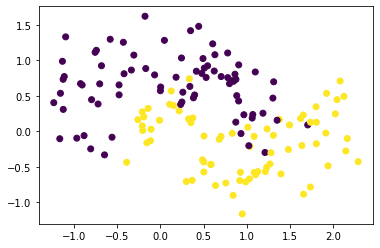

In [4]:
# データの生成と表示
X, y = make_moons(n_samples=200, noise=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

0.92


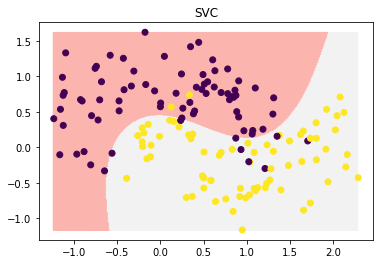

In [55]:
# RBF カーネルでのクラス識別

from sklearn.svm import SVC

mdl = SVC(kernel="rbf")
mdl.fit(X_train, y_train)
print(accuracy_score(mdl.predict(X_test), y_test))

plt_predict(mdl, plt.gca(), X_train, 'SVC')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

0.74


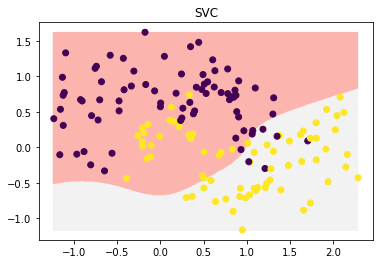

In [71]:
# 多項式カーネルでのクラス識別

mdl = SVC(kernel="poly", degree=5, C=1)
mdl.fit(X_train, y_train)
print(accuracy_score(mdl.predict(X_test), y_test))

plt_predict(mdl, plt.gca(), X_train, 'SVC')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

#### 備考
SVM は非常に強力でニューラルネットワークが2010年代にリバイバルする直前の2000年代には、
綿密に設計された特徴量抽出器とSVMを組み合わせる用いる方法が一般的だった。